# Task 1 Keras Simple CNN

Simple implementation of CNN from MNIST tutorial. 2 layer CNN.

In [1]:
#import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import json
import os

Using TensorFlow backend.


In [2]:
#read in and clean the data
np.random.seed(1234)

#read in the data
DATA_DIR = "../Data/"

train_raw = open(DATA_DIR + "train.json", "r").read()
train = json.loads(train_raw)

test_raw = open(DATA_DIR + 'test.json', 'r').read()
test = json.loads(test_raw)

In [3]:
#get the images' pixel arrays out of the lists
train_band_2s = np.array([train[x]['band_2'] for x in range(len(train))])
train_band_1s = np.array([train[x]['band_1'] for x in range(len(train))])

train_labels = np.array([train[x]['is_iceberg'] for x in range(len(train))])

test_band_2s = np.array([test[x]['band_2'] for x in range(len(test))])
test_band_1s = np.array([test[x]['band_1'] for x in range(len(test))])

In [4]:
show_imgs = train_band_1s.reshape(train_band_1s.shape[0], 75, 75)

In [5]:
print train_labels[:10]

[0 0 1 0 0 1 1 0 0 0]


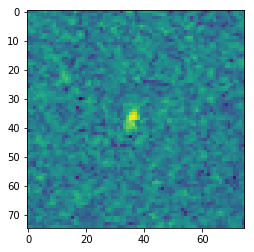

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(show_imgs[2])

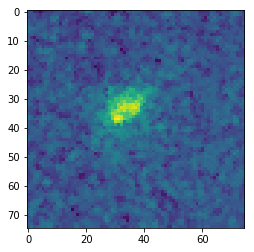

In [7]:
plt.imshow(show_imgs[5])

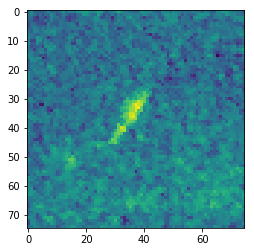

In [8]:
plt.imshow(show_imgs[6])

In [9]:
train_band_1s = train_band_1s.reshape(train_band_1s.shape[0], 75, 75, 1)
train_band_2s = train_band_2s.reshape(train_band_2s.shape[0], 75, 75, 1)

test_band_1s = test_band_1s.reshape(test_band_1s.shape[0], 75, 75, 1)
test_band_2s = test_band_2s.reshape(test_band_2s.shape[0], 75, 75, 1)

In [10]:
#change the number types
train_band_1s = train_band_1s.astype('float32')
train_band_2s = train_band_2s.astype('float32')
test_band_1s = test_band_1s.astype('float32')
test_band_2s = test_band_2s.astype('float32')

In [11]:
#put the pixel values on a spectrum of [0, 1]
train_band_1s /= 255
train_band_2s /= 255
test_band_1s /= 255
test_band_2s /= 255

In [12]:
#fix the dimensions of the labels
train_labels = np_utils.to_categorical(train_labels, 2)

In [13]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(75, 75, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

In [14]:
#fit the model
model.fit(train_band_1s, train_labels, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1604/1604 [==============================] - 73s - loss: 0.6362 - acc: 0.5879    
Epoch 2/10
1604/1604 [==============================] - 39s - loss: 0.5814 - acc: 0.6571    
Epoch 3/10
1604/1604 [==============================] - 38s - loss: 0.5742 - acc: 0.6690    
Epoch 4/10
1604/1604 [==============================] - 38s - loss: 0.5639 - acc: 0.6696    
Epoch 5/10
1604/1604 [==============================] - 37s - loss: 0.5457 - acc: 0.6814    
Epoch 6/10
1604/1604 [==============================] - 42s - loss: 0.5227 - acc: 0.7064    
Epoch 7/10
1604/1604 [==============================] - 39s - loss: 0.4941 - acc: 0.7288    
Epoch 8/10
1604/1604 [==============================] - 39s - loss: 0.4500 - acc: 0.7650    
Epoch 9/10
1604/1604 [==============================] - 41s - loss: 0.4014 - acc: 0.7911    
Epoch 10/10
1604/1604 [==============================] - 39s - loss: 0.3916 - acc: 0.7999    


In [49]:
scores = model.predict(test_band_1s)

In [50]:
scores = [scores[x][1] for x in range(len(scores))]

In [51]:
ids = [test[x]['id'] for x in range(len(test))]

In [52]:
scores = pd.DataFrame(scores)
ids = pd.DataFrame(ids)
frames = [ids, scores]
preds = pd.concat(frames, axis=1)
preds.columns = ['id', 'is_iceberg']

In [53]:
preds.to_csv("preds.csv", sep=',', index=False)

In [54]:
model.save("cnn1.h5")